In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
import os

In [3]:
print(os.listdir("../"))

['faceTrain', 'FYP face recog', 'FYP-P1', 'input', 'MLDM', 'NCP', 'NCP-Project', 'New folder', 'NLP', 'ORLDatabase', 'ORLinput', 'ORLTest', 'ORLTrain', 'PDC', 'SICP', 'test', 'train']


In [5]:
import keras
from keras.models import Model
from keras.layers import Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [6]:
os.listdir("../ORLtrain")

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [7]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="../ORLtrain",target_size=(224,224))

Found 57 images belonging to 10 classes.


In [8]:
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="../ORLtest", target_size=(224,224))

Found 36 images belonging to 10 classes.


In [9]:
base_model = tf.keras.applications.MobileNetV2(include_top=False,
                                               weights='imagenet')

In [10]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, None, None, 3 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, None, None, 3 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [11]:
for layers in (base_model.layers):
    print(layers)
    layers.trainable = False

In [12]:
model = tf.keras.Sequential([
    base_model,  
    tf.keras.layers.Conv2D(32, 3, activation='relu'), 
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(10, activation='softmax') 
])

In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(),  # 1
              loss='categorical_crossentropy',  # 2
              metrics=['accuracy'])

In [14]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, None, None, 1280)  2257984   
_________________________________________________________________
conv2d (Conv2D)              (None, None, None, 32)    368672    
_________________________________________________________________
dropout (Dropout)            (None, None, None, 32)    0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                330       
Total params: 2,626,986
Trainable params: 369,002
Non-trainable params: 2,257,984
_________________________________________________________________


In [15]:
print('Number of trainable variables = {}'.format(len(model.trainable_variables)))

Number of trainable variables = 4


In [16]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
# checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='accuracy', min_delta=0, patience=40, verbose=1, mode='auto')

In [18]:
hist = model.fit_generator(generator= traindata, steps_per_epoch= 2, epochs= 5, validation_data= testdata, validation_steps=1, callbacks=[early])

C:\Users\shakt\anaconda3\envs\vggfacemodel\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
2/2 [==============================] - 502s 2s/step - loss: 4.0588 - accuracy: 0.1930 - val_loss: 3.6085 - val_accuracy: 0.1875
Epoch 2/5
2/2 [==============================] - 0s 291ms/step - loss: 2.0408 - accuracy: 0.3333 - val_loss: 3.0817 - val_accuracy: 0.0938
Epoch 3/5
2/2 [==============================] - 0s 254ms/step - loss: 1.5975 - accuracy: 0.3860 - val_loss: 2.9532 - val_accuracy: 0.1875
Epoch 4/5
2/2 [==============================] - 0s 294ms/step - loss: 1.4625 - accuracy: 0.4035 - val_loss: 3.0805 - val_accuracy: 0.2500
Epoch 5/5
2/2 [==============================] - 0s 259ms/step - loss: 1.2621 - accuracy: 0.5614 - val_loss: 3.4599 - val_accuracy: 0.2188


In [20]:
model.save_weights("mobileNetV2_1.h5")

In [21]:
for e,i in enumerate(os.listdir("../ORLinput/Test")):
    print(i)
    output=[]
    img = image.load_img(os.path.join("../ORLinput/Test",i),target_size=(224,224))
    img = np.asarray(img)
    img = np.expand_dims(img, axis=0)
    output = model.predict(img)
    print(output)

100_10.jpg
[[6.9225358e-04 1.2895107e-06 1.1542918e-04 1.5966715e-06 4.4667846e-04
  5.2206771e-04 3.0426318e-05 4.5793473e-05 1.9307381e-03 9.9621361e-01]]
10_1.jpg
[[0.3814195  0.00458374 0.13388382 0.02514584 0.03253197 0.12426918
  0.00334041 0.23656073 0.04463813 0.01362659]]
14_2.jpg
[[0.09079236 0.32851765 0.10724194 0.13580017 0.0129696  0.08422142
  0.21659833 0.00546433 0.01372065 0.00467348]]
18_2.jpg
[[0.05460669 0.50899637 0.11412229 0.05768873 0.00417294 0.0732405
  0.17624167 0.00284435 0.00465704 0.0034294 ]]
19_2.jpg
[[0.05407664 0.42743737 0.14172304 0.08772016 0.00874943 0.1213604
  0.1380491  0.00443354 0.01082026 0.00563011]]
20_2.jpg
[[0.05673911 0.4878034  0.11677109 0.07219212 0.00555189 0.07817317
  0.1693264  0.00306714 0.00656991 0.00380577]]
24_3.jpg
[[0.14350355 0.01159531 0.17195913 0.05477558 0.06459934 0.2821183
  0.00544895 0.14154217 0.09907862 0.02537908]]
28_3.jpg
[[0.08588795 0.12212936 0.18481481 0.18171167 0.04198298 0.24660295
  0.04194307 0.0156

In [23]:
for e,i in enumerate(os.listdir("../ORLinput/Test")):
    print(i)
    output=[]
    img = image.load_img(os.path.join("../ORLinput/Test",i),target_size=(224,224))
    img = np.asarray(img)
    img = np.expand_dims(img, axis=0)
    output = model.predict(img)
    # output[0].where(output[0].max())
    x = np.where(output[0] == output[0].max())
    # output[0]
    x = x[0]
    print(x)

100_10.jpg
[9]
10_1.jpg
[0]
14_2.jpg
[1]
18_2.jpg
[1]
19_2.jpg
[1]
20_2.jpg
[1]
24_3.jpg
[5]
28_3.jpg
[5]
29_3.jpg
[2]
30_3.jpg
[5]
34_4.jpg
[3]
38_4.jpg
[3]
39_4.jpg
[3]
40_4.jpg
[5]
44_5.jpg
[5]
48_5.jpg
[5]
49_5.jpg
[5]
4_1.jpg
[0]
50_5.jpg
[5]
54_6.jpg
[5]
58_6.jpg
[5]
59_6.jpg
[5]
60_6.jpg
[5]
64_7.jpg
[5]
68_7.jpg
[6]
69_7.jpg
[6]
70_7.jpg
[1]
74_8.jpg
[7]
78_8.jpg
[7]
79_8.jpg
[7]
80_8.jpg
[2]
8_1.jpg
[0]
93_9.jpg
[8]
94_9.jpg
[9]
99_10.jpg
[9]
9_1.jpg
[0]


In [24]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

In [25]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

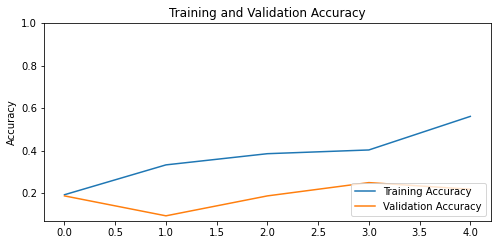

In [26]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Accuracy')

Text(0.5, 0, 'epoch')

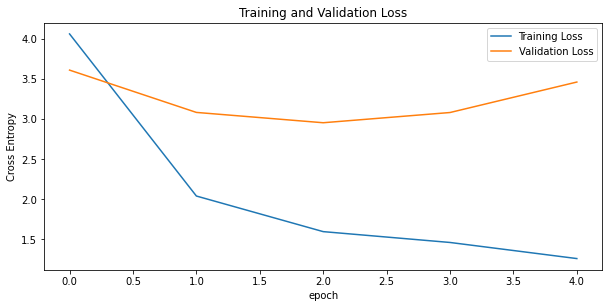

In [29]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
# plt.ylim([0, 1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
# plt.show()